In [62]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

from collections import Counter
from collections import defaultdict

from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from collections import defaultdict
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report

from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing


C:\Users\ondre\AppData\Local\Temp\ipykernel_28304\871709218.py:15: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [63]:

df_train = pd.read_csv("./X_trainc.csv",skipinitialspace=True)
df_test = pd.read_csv("./X_testc.csv",skipinitialspace=True)

In [64]:
df_test

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1",...,fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)",Activity,ActivityName,subject
0,0.257178,-0.023285,-0.014654,-0.938404,-0.168084,0.246217,0.521204,0.482280,-0.045462,0.211955,...,-1.000000,0.071645,-0.330370,0.006462,0.162920,-0.825886,0.271151,5,STANDING,2
1,0.286027,-0.013163,-0.119083,-0.975415,-0.302437,-0.404785,0.507492,0.040674,0.272991,0.197566,...,-1.000000,-0.401189,-0.121845,-0.083495,0.017500,-0.434375,0.920593,5,STANDING,2
2,0.275485,-0.026050,-0.118152,-0.993819,-0.617916,-0.536693,0.242147,0.032703,0.192385,-0.011945,...,-0.936508,0.062891,-0.190422,-0.034956,0.202302,0.064103,0.145068,5,STANDING,2
3,0.270298,-0.032614,-0.117520,-0.994743,-0.749578,-0.553813,0.174684,0.034200,0.153639,0.030767,...,-0.936508,0.116695,-0.344418,-0.017067,0.154438,0.340134,0.296407,5,STANDING,2
4,0.274833,-0.027848,-0.129527,-0.993852,-0.590576,-0.799419,0.115570,-0.032804,0.294340,0.000630,...,-0.936508,-0.121711,-0.534685,-0.002223,-0.040046,0.736715,-0.118545,5,STANDING,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,0.128951,0.204483,-0.336571,0.114556,0.069925,-0.225460,...,-0.904762,0.074472,-0.376278,-0.337422,0.346295,0.884904,-0.698885,2,WALKING_UPSTAIRS,24
2943,0.363385,-0.039214,-0.105915,-0.305388,0.311991,0.112971,-0.141648,0.124019,0.133963,-0.171622,...,-0.904762,0.101859,-0.320418,-0.736701,-0.372889,-0.657421,0.322549,2,WALKING_UPSTAIRS,24
2944,0.349966,0.030077,-0.115788,-0.329638,0.342902,0.167789,-0.093074,0.400424,-0.123618,-0.117599,...,-0.904762,-0.066249,-0.118854,-0.181560,0.088574,0.696663,0.363139,2,WALKING_UPSTAIRS,24
2945,0.237594,0.018467,-0.096499,-0.323114,0.194918,0.352585,-0.100123,0.541771,-0.204716,-0.133353,...,-0.904762,-0.046467,-0.205445,0.444558,-0.819188,0.929294,-0.008398,2,WALKING_UPSTAIRS,24


In [65]:
df_train = df_train.drop(['ActivityName', 'subject'], axis = 1)
df_test = df_test.drop(['ActivityName', 'subject'],axis = 1)

In [66]:
df_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1",...,fBodyBodyGyroMag-skewness(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.407747,-0.602122,0.929294,0.359910,-0.058526,0.256892,...,0.586156,-0.991048,-1.000000,-0.074323,-0.298676,-0.112754,0.030400,-0.464761,-0.018446,5
1,0.278419,-0.016411,-0.123520,-0.998245,-0.714892,-0.570979,0.611627,0.284213,0.284595,0.115705,...,-0.336310,-0.994440,-1.000000,0.158075,-0.595051,0.053477,-0.007435,-0.732626,0.703511,5
2,0.279653,-0.019467,-0.113462,-0.995380,-0.592235,-0.570979,0.273025,0.337202,-0.164739,0.017150,...,-0.535352,-0.995866,-0.555556,0.414503,-0.390748,-0.118559,0.177899,0.100699,0.808529,5
3,0.279174,-0.026201,-0.123283,-0.996091,-0.627446,-0.911872,0.061436,0.198204,-0.264307,0.072545,...,-0.230091,-0.995732,-0.936508,0.404573,-0.117290,-0.036788,-0.012892,0.640011,-0.485366,5
4,0.276629,-0.016570,-0.115362,-0.998139,-0.786553,-0.761434,0.313276,0.191161,0.086904,0.257615,...,-0.510282,-0.997418,-0.936508,0.087753,-0.351471,0.123320,0.122542,0.693578,-0.615971,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.195643,-0.082077,-0.561607,-0.078255,-0.056751,-0.094106,...,-0.170845,-0.925241,-0.904762,-0.070157,-0.588433,-0.190437,0.829718,0.206972,-0.425619,2
7348,0.273853,-0.007749,-0.147468,-0.235309,0.178138,-0.051532,-0.361660,0.206839,-0.154722,0.032725,...,0.019626,-0.761880,-0.904762,0.165259,-0.390738,0.064907,0.875679,-0.879033,0.400219,2
7349,0.273387,-0.017011,-0.045022,-0.218218,0.173131,0.152003,-0.376773,0.063584,-0.017019,-0.004323,...,0.490169,-0.692582,-0.904762,0.195034,0.025145,0.052806,-0.266724,0.864404,0.701169,2
7350,0.289654,-0.018843,-0.158281,-0.219139,0.160333,0.021678,-0.475165,0.009588,-0.038354,-0.277801,...,0.308105,-0.886154,-0.904762,0.013865,0.063907,-0.101360,0.700740,0.936674,-0.589479,2


In [67]:
y_train = pd.read_csv('y_train.txt', names=['Activity'], squeeze=True)

y_test = pd.read_csv('y_test.txt', names=['Activity'], squeeze=True)


class_mapping = {'WALKING':1,'WALKING_UPSTAIRS':2,'WALKING_DOWNSTAIRS':3,
                       'SITTING':4, 'STANDING':5,'LAYING':6}

C:\Users\ondre\AppData\Local\Temp\ipykernel_28304\699866427.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  y_train = pd.read_csv('y_train.txt', names=['Activity'], squeeze=True)
C:\Users\ondre\AppData\Local\Temp\ipykernel_28304\699866427.py:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  y_test = pd.read_csv('y_test.txt', names=['Activity'], squeeze=True)


In [68]:
X_train = df_train.drop(['Activity'], axis = 1).values
y_train = np.array(y_train)

X_test = df_test.drop(['Activity'], axis = 1).values
y_test = np.array(y_test)

In [69]:
''''
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for grid search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1.0, 10],
    'solver': ['lbfgs', 'liblinear', 'sag', 'saga', 'newton-cg'],
    'penalty': ['l1', 'l2'] if 'solver' in ['saga', 'lbfgs', 'sag'] else ['l2'],  # Exclude 'elasticnet' for liblinear
    'max_iter': [1000, 1500],
    'tol': [1e-4, 1e-5, 1e-3, 1e-2],
    'class_weight': ['balanced', None]
}

# Create the logistic regression classifier
logistic_regression = LogisticRegression(random_state=0, max_iter = 1000)

# Create the grid search object
grid_search = RandomizedSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy', n_iter = 50, n_jobs = -1)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best parameters found
print("Best Parameters:", best_params)
''''


SyntaxError: unterminated string literal (detected at line 31) (967607008.py, line 31)

Best Parameters: {'tol': 0.001, 'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 500, 'C': 1.0} \
Best Parameters: {'tol': 1e-05, 'solver': 'saga', 'penalty': None, 'max_iter': 1000, 'C': 10} \
Best Parameters: {'tol': 0.0001, 'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 1500, 'C': 1.0}

In [ ]:
Best Parameters: {'tol': 0.0001, 'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 1000, 'class_weight': None, 'C': 10}


In [71]:
clf = LogisticRegression(tol=0.01, C=10, solver = 'lbfgs', penalty = 'l2' , max_iter  = 1000, class_weight = None )
clf.fit(X_train, y_train.ravel())

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1_scores = f1_score(y_test, y_pred, average='macro')
classification_rep = classification_report(y_test, y_pred, target_names = class_mapping, digits = 3)

print('Accuracy:', accuracy)
print('F1-score_macro:', f1_scores)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.9440108585001696
F1-score_macro: 0.9434571068117744
Classification Report:
                    precision    recall  f1-score   support

           WALKING      0.931     0.982     0.956       496
  WALKING_UPSTAIRS      0.939     0.921     0.930       471
WALKING_DOWNSTAIRS      0.973     0.936     0.954       420
           SITTING      0.938     0.870     0.903       491
          STANDING      0.892     0.947     0.919       532
            LAYING      0.998     1.000     0.999       537

          accuracy                          0.944      2947
         macro avg      0.945     0.943     0.943      2947
      weighted avg      0.945     0.944     0.944      2947



c:\Users\ondre\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


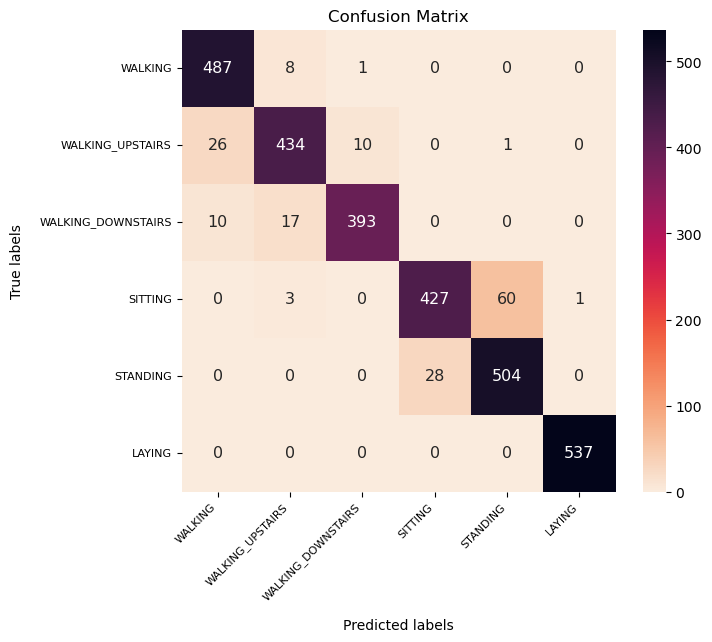

                    precision    recall  f1-score   support

           WALKING      0.931     0.982     0.956       496
  WALKING_UPSTAIRS      0.939     0.921     0.930       471
WALKING_DOWNSTAIRS      0.973     0.936     0.954       420
           SITTING      0.938     0.870     0.903       491
          STANDING      0.892     0.947     0.919       532
            LAYING      0.998     1.000     0.999       537

          accuracy                          0.944      2947
         macro avg      0.945     0.943     0.943      2947
      weighted avg      0.945     0.944     0.944      2947



In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Predict using the best model
y_pred = clf.predict(X_test)
y_pred = y_pred.reshape(y_test.shape)

# Calculate the confusion matrix
cm = confusion_matrix(y_test.ravel(), y_pred)

# Define the inverse class mapping
inv_class_mapping = {v: k for k, v in class_mapping.items()}

# Define the class labels from unique values in y_test and y_pred
class_labels = np.unique(np.concatenate((y_test, y_pred)))

# Define the class names using inv_class_mapping and class_labels
class_names = [inv_class_mapping[label] for label in class_labels]

# Set a more contrasting color scheme
cmap = sns.color_palette('rocket_r', as_cmap=True)

# Plot the confusion matrix
plt.figure(figsize=(7, 6))
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, xticklabels=class_names, yticklabels=class_names, cmap=cmap, annot_kws={"fontsize": 11.5})

# Set x-axis label distance
ax.xaxis.labelpad = 11

# Set y-axis label distance
ax.yaxis.labelpad = 11

# Set tick label font size and distance for class names
ax.set_xticklabels(class_names, fontsize=8, rotation=45, ha='right')
ax.set_yticklabels(class_names, fontsize=8)

# Set labels and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

plt.show()

# Print the classification report
classification_rep = classification_report(y_test.ravel(), y_pred, target_names=class_names, digits = 3)
print(classification_rep)


c:\Users\ondre\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


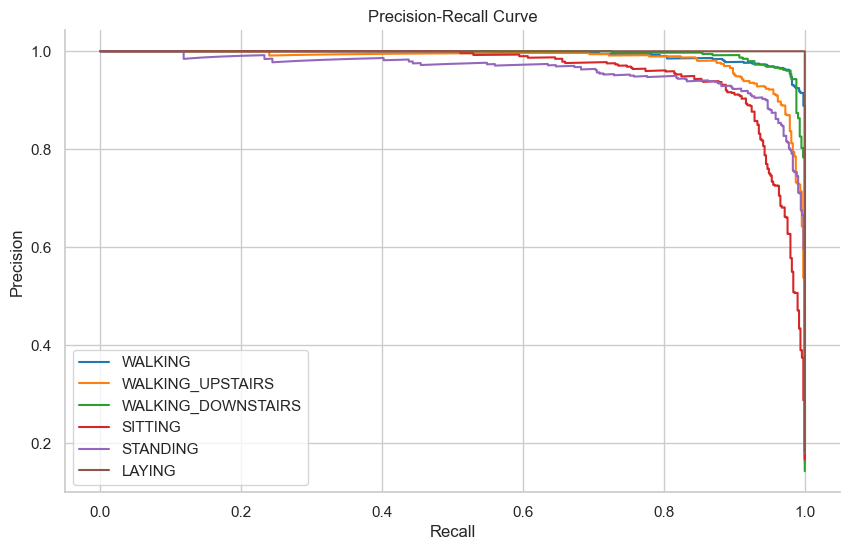

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier

# Set a seaborn style
sns.set(style="whitegrid")


# Assuming X_train, X_test, y_train, y_test are defined
clf.fit(X_train, y_train)

# Predict probabilities
y_scores = clf.predict_proba(X_test)

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Define your class mapping
class_mapping = {'WALKING': 1, 'WALKING_UPSTAIRS': 2, 'WALKING_DOWNSTAIRS': 3,
                 'SITTING': 4, 'STANDING': 5, 'LAYING': 6}

# Define clear colors for each class
class_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Plotting precision-recall curves
plt.figure(figsize=(10, 6))
for class_idx, class_name in class_mapping.items():
    class_label = list(class_mapping.keys()).index(class_idx)  # Convert class index to label
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, class_label], y_scores[:, class_label])
    plt.plot(recall, precision, color=class_colors[class_label], label=class_idx)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
sns.despine()
plt.show()


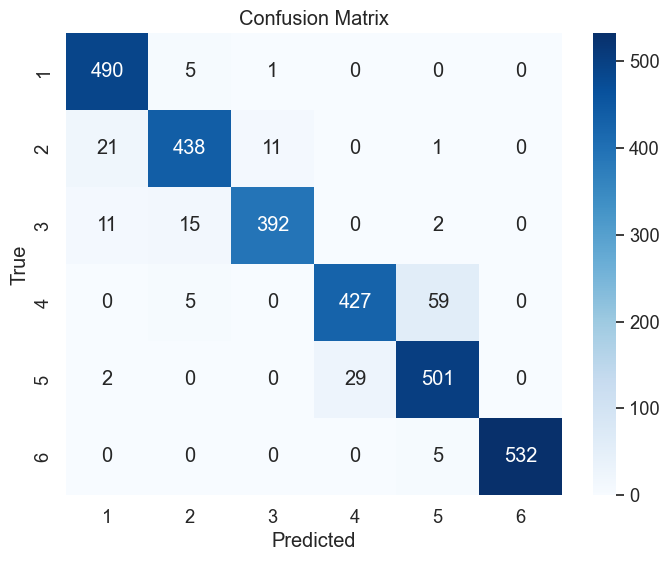

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are your true labels and predicted labels respectively
cm = confusion_matrix(y_test, y_pred)

# Get unique class labels from your data
class_labels = np.unique(np.concatenate((y_test, y_pred)))

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


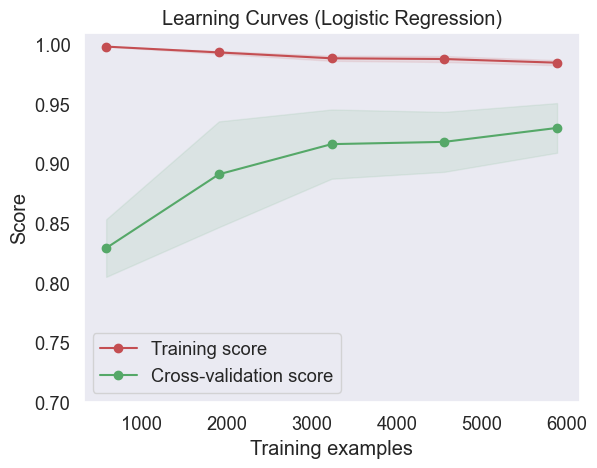

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Create a function to plot learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Assuming you have your X_train and y_train ready

title = "Learning Curves (Logistic Regression)"
plot_learning_curve(clf, title, X_train, y_train.ravel(), ylim=(0.7, 1.01), cv=5, n_jobs=4)

plt.show()


### FULL DIMENSIONS WITHOUT ANY MODIFICATION (no outlier detection)

In [ ]:

from pyod.models.iforest import IsolationForest

In [ ]:
from pyod.models.loda import LODA


clf = LODA(contamination = 0.01)
clf.fit(df_train)

outliers_loda = clf.predict(df_train)

np.unique(outliers_loda, return_counts=True)

(array([0, 1]), array([7278,   74], dtype=int64))

In [ ]:

from pyod.models.abod import ABOD
clf = ABOD(contamination = 0.01)
clf.fit(df_train)

outliers = clf.predict(df_train)     # 142 with ABOD 5 %
np.unique(outliers, return_counts=True)
np.count_nonzero(outliers == 1)
outlier_indices = np.where(outliers == 1)[0]
outlier_variables = df_train.iloc[outlier_indices]
#print(f'Outlier variables:\n{outlier_variables}')

outlier_variables

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1",...,fBodyBodyGyroMag-skewness(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)",Activity
69,0.303833,0.103648,-0.245331,-0.755994,0.503503,-0.632568,-0.278010,-0.546169,0.249501,-0.182294,...,-0.037418,-0.883307,-1.000000,-0.281684,-0.268042,-0.116769,-0.391404,0.413596,0.051020,6
138,0.445621,-0.011903,-0.151169,0.118209,0.406952,-0.012374,-0.308909,-0.300679,0.444083,-0.420374,...,-0.725690,0.100203,-0.936508,0.084885,-0.231052,-0.693854,0.435756,-0.954718,0.777159,3
139,0.231799,-0.007522,-0.055801,0.063689,0.296230,0.206436,-0.818456,-0.895521,0.545080,-0.373330,...,-0.438781,-0.283867,-0.968254,0.179242,-0.251705,0.378196,0.894064,0.812622,-0.424187,3
181,0.265806,-0.032762,-0.117312,-0.992678,-0.796401,-0.587786,-0.062807,-0.251151,-0.007250,0.068363,...,-0.114095,-0.986496,-0.968254,0.118830,-0.087476,-0.006971,0.027413,-0.209603,0.590699,5
225,0.310763,0.018054,-0.205548,-0.950144,-0.058798,-0.340416,-0.326889,-0.199509,-0.058896,0.034414,...,0.531684,-0.987591,-1.000000,-0.270028,0.104227,0.001406,-0.022967,0.518138,-0.832382,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7063,0.281213,-0.017136,-0.110965,-0.996051,-0.569048,-0.677545,0.234278,0.239189,0.017064,0.533769,...,-0.538531,-0.998332,-0.936508,0.765237,-0.552435,0.257540,-0.231588,0.700022,-0.450498,6
7176,0.279461,-0.023736,-0.101396,-0.978408,-0.269625,-0.207457,-0.103460,0.163453,0.040337,-0.279585,...,0.125800,-0.976961,-0.904762,-0.008854,-0.449467,-0.053910,-0.156886,-0.907320,-0.859157,5
7188,0.283089,-0.011299,-0.101994,-0.957469,-0.465693,-0.244325,0.638405,-0.100889,0.789854,-0.026216,...,-0.227476,-0.909765,-1.000000,-0.500553,-0.398253,-0.115737,-0.412177,0.391133,0.204512,5
7240,0.282245,-0.016027,-0.111472,-0.988134,-0.397255,-0.550075,0.206123,0.462599,-0.189710,0.188041,...,-0.252354,-0.993279,-1.000000,-0.277977,-0.010325,0.044766,-0.036511,-0.632488,-0.101631,6


In [ ]:
np.unique(outliers, return_counts=True)

(array([0, 1]), array([7167,  185], dtype=int64))

## LOG_REG using ABOD and without RFE or SelectFromModel

In [ ]:
from pyod.models.abod import ABOD
import numpy as np
import pandas as pd

# Assuming you have your data in a DataFrame called df_train
# Make sure df_train contains only the features and no labels

# Instantiate and fit the ABOD model
clf = ABOD(contamination=0.01)
clf.fit(df_train)

# Predict outliers using the fitted model
outliers = clf.predict(df_train)

# Get the indices of non-outlier instances
non_outlier_indices = np.where(outliers == 0)[0]

# Filter the DataFrame to keep only non-outlier instances
df_train_no_outliers = df_train.iloc[non_outlier_indices]

# Print the DataFrame with non-outliers
df_train_no_outliers

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1",...,fBodyBodyGyroMag-skewness(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.407747,-0.602122,0.929294,0.359910,-0.058526,0.256892,...,0.586156,-0.991048,-1.000000,-0.074323,-0.298676,-0.112754,0.030400,-0.464761,-0.018446,5
1,0.278419,-0.016411,-0.123520,-0.998245,-0.714892,-0.570979,0.611627,0.284213,0.284595,0.115705,...,-0.336310,-0.994440,-1.000000,0.158075,-0.595051,0.053477,-0.007435,-0.732626,0.703511,5
2,0.279653,-0.019467,-0.113462,-0.995380,-0.592235,-0.570979,0.273025,0.337202,-0.164739,0.017150,...,-0.535352,-0.995866,-0.555556,0.414503,-0.390748,-0.118559,0.177899,0.100699,0.808529,5
3,0.279174,-0.026201,-0.123283,-0.996091,-0.627446,-0.911872,0.061436,0.198204,-0.264307,0.072545,...,-0.230091,-0.995732,-0.936508,0.404573,-0.117290,-0.036788,-0.012892,0.640011,-0.485366,5
4,0.276629,-0.016570,-0.115362,-0.998139,-0.786553,-0.761434,0.313276,0.191161,0.086904,0.257615,...,-0.510282,-0.997418,-0.936508,0.087753,-0.351471,0.123320,0.122542,0.693578,-0.615971,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.195643,-0.082077,-0.561607,-0.078255,-0.056751,-0.094106,...,-0.170845,-0.925241,-0.904762,-0.070157,-0.588433,-0.190437,0.829718,0.206972,-0.425619,2
7348,0.273853,-0.007749,-0.147468,-0.235309,0.178138,-0.051532,-0.361660,0.206839,-0.154722,0.032725,...,0.019626,-0.761880,-0.904762,0.165259,-0.390738,0.064907,0.875679,-0.879033,0.400219,2
7349,0.273387,-0.017011,-0.045022,-0.218218,0.173131,0.152003,-0.376773,0.063584,-0.017019,-0.004323,...,0.490169,-0.692582,-0.904762,0.195034,0.025145,0.052806,-0.266724,0.864404,0.701169,2
7350,0.289654,-0.018843,-0.158281,-0.219139,0.160333,0.021678,-0.475165,0.009588,-0.038354,-0.277801,...,0.308105,-0.886154,-0.904762,0.013865,0.063907,-0.101360,0.700740,0.936674,-0.589479,2


In [ ]:
# no out means without outliers which have been dropped out

X_train_no_out = df_train_no_outliers.drop(['Activity'], axis = 1).values
y_train_no_out = np.array(df_train_no_outliers[['Activity']])

X_test = df_test.drop(['Activity'], axis = 1).values
y_test = np.array(df_test[['Activity']])

In [ ]:


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for grid search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1.0, 10],
    'solver': ['lbfgs', 'liblinear', 'sag', 'saga', 'newton-cg'],
    'penalty': ['l1', 'l2'] if 'solver' in ['saga', 'lbfgs', 'sag'] else ['l2'],  # Exclude 'elasticnet' for liblinear
    'max_iter': [1000, 1500],
    'tol': [1e-4, 1e-5, 1e-3, 1e-2],
    'class_weight': ['balanced', None]
}

# Create the logistic regression classifier
log_reg_no_out = LogisticRegression(random_state=0, max_iter = 500, n_jobs =-1)

# Create the grid search object
grid_search = RandomizedSearchCV(log_reg_no_out, param_grid, cv=5, scoring='accuracy', n_iter = 50, error_score='raise', n_jobs = -1)

# Perform grid search on the training data
grid_search.fit(X_train_no_out, y_train_no_out.ravel())

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best parameters found
print("Best Parameters:", best_params)


c:\Users\ondre\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 20.
  warnings.warn(


Best Parameters: {'tol': 0.0001, 'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 1000, 'class_weight': None, 'C': 1.0}


Best Parameters: {'tol': 1e-05, 'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 1500, 'class_weight': 'balanced', 'C': 1.0} for 2% abod 

Best Parameters for 1% : {'tol': 0.0001, 'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 1500, 'class_weight': 'balanced', 'C': 10}

In [ ]:
clf = LogisticRegression(tol=0.0001, C=10, solver = 'liblinear', penalty = 'l2' , max_iter  = 1500, class_weight = 'balanced' )
clf.fit(X_train_no_out, y_train_no_out.ravel())

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1_scores = f1_score(y_test, y_pred, average='macro')
classification_rep = classification_report(y_test, y_pred, target_names = class_mapping, digits = 3 )

print('Accuracy:', accuracy)
print('F1-score_macro:', f1_scores)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.9395995928062436
F1-score_macro: 0.9399919563338642
Classification Report:
                    precision    recall  f1-score   support

           WALKING      0.940     0.980     0.960       496
  WALKING_UPSTAIRS      0.947     0.941     0.944       471
WALKING_DOWNSTAIRS      0.975     0.945     0.960       420
           SITTING      0.920     0.864     0.891       491
          STANDING      0.868     0.927     0.896       532
            LAYING      1.000     0.980     0.990       537

          accuracy                          0.940      2947
         macro avg      0.942     0.939     0.940      2947
      weighted avg      0.941     0.940     0.940      2947



In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

rfe = RFE(DecisionTreeClassifier(random_state = 43), n_features_to_select=40)
X_train_rfe = rfe.fit_transform(X_train_no_out, y_train_no_out)



X_test_rfe = rfe.transform(X_test) 



Best Parameters: {'tol': 0.01, 'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 1500, 'class_weight': 'balanced', 'C': 10}
